In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
sns.set(rc = {'figure.figsize': (20, 20)})
%matplotlib inline 

In [2]:
data = pd.read_csv('data/data.csv')

In [3]:
data.shape

(11914, 16)

In [4]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [6]:
data['Make'].unique()

array(['BMW', 'Audi', 'FIAT', 'Mercedes-Benz', 'Chrysler', 'Nissan',
       'Volvo', 'Mazda', 'Mitsubishi', 'Ferrari', 'Alfa Romeo', 'Toyota',
       'McLaren', 'Maybach', 'Pontiac', 'Porsche', 'Saab', 'GMC',
       'Hyundai', 'Plymouth', 'Honda', 'Oldsmobile', 'Suzuki', 'Ford',
       'Cadillac', 'Kia', 'Bentley', 'Chevrolet', 'Dodge', 'Lamborghini',
       'Lincoln', 'Subaru', 'Volkswagen', 'Spyker', 'Buick', 'Acura',
       'Rolls-Royce', 'Maserati', 'Lexus', 'Aston Martin', 'Land Rover',
       'Lotus', 'Infiniti', 'Scion', 'Genesis', 'HUMMER', 'Tesla',
       'Bugatti'], dtype=object)

In [7]:
data['Year'].unique()

array([2011, 2012, 2013, 1992, 1993, 1994, 2017, 1991, 2016, 1990, 2015,
       1996, 1997, 1998, 2014, 1999, 2002, 2003, 2004, 1995, 2007, 2008,
       2009, 2001, 2010, 2000, 2005, 2006], dtype=int64)

In [8]:
data['Transmission Type'].unique()

array(['MANUAL', 'AUTOMATIC', 'AUTOMATED_MANUAL', 'DIRECT_DRIVE',
       'UNKNOWN'], dtype=object)

In [15]:
data.nunique()

Make                   48
Model                 915
Year                   28
Engine Fuel Type       10
Engine HP             356
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Market Category        71
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
MSRP                 6049
dtype: int64

In [16]:
data['Driven_Wheels'].unique()

array(['rear wheel drive', 'front wheel drive', 'all wheel drive',
       'four wheel drive'], dtype=object)

In [17]:
data['Vehicle Size'].unique()

array(['Compact', 'Midsize', 'Large'], dtype=object)

In [18]:
data['Number of Doors'].unique()

array([ 2.,  4.,  3., nan])

In [19]:
data['Market Category'].unique()

array(['Factory Tuner,Luxury,High-Performance', 'Luxury,Performance',
       'Luxury,High-Performance', 'Luxury', 'Performance', 'Flex Fuel',
       'Flex Fuel,Performance', nan, 'Hatchback',
       'Hatchback,Luxury,Performance', 'Hatchback,Luxury',
       'Luxury,High-Performance,Hybrid', 'Diesel,Luxury',
       'Hatchback,Performance', 'Hatchback,Factory Tuner,Performance',
       'High-Performance', 'Factory Tuner,High-Performance',
       'Exotic,High-Performance', 'Exotic,Factory Tuner,High-Performance',
       'Factory Tuner,Performance', 'Crossover', 'Exotic,Luxury',
       'Exotic,Luxury,High-Performance', 'Exotic,Luxury,Performance',
       'Factory Tuner,Luxury,Performance', 'Flex Fuel,Luxury',
       'Crossover,Luxury', 'Hatchback,Factory Tuner,Luxury,Performance',
       'Crossover,Hatchback', 'Hybrid', 'Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance',
       'Exotic,Factory Tuner,Luxury,High-Performance',
   

In [20]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [21]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


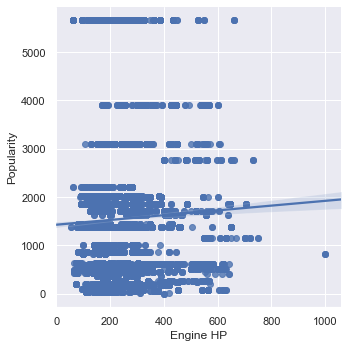

In [24]:
sns.set(rc = {'figure.figsize': (20, 20)})
sns.lmplot(x = 'Engine HP', y = 'Popularity', data = data)

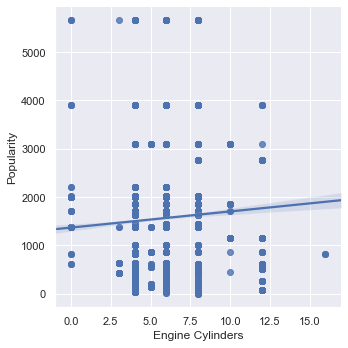

In [25]:
sns.lmplot(x = 'Engine Cylinders', y = 'Popularity', data = data)

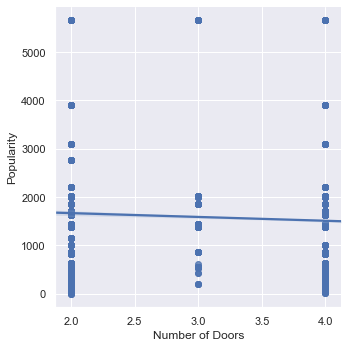

In [26]:
sns.lmplot(x = 'Number of Doors', y = 'Popularity', data = data)

In [27]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


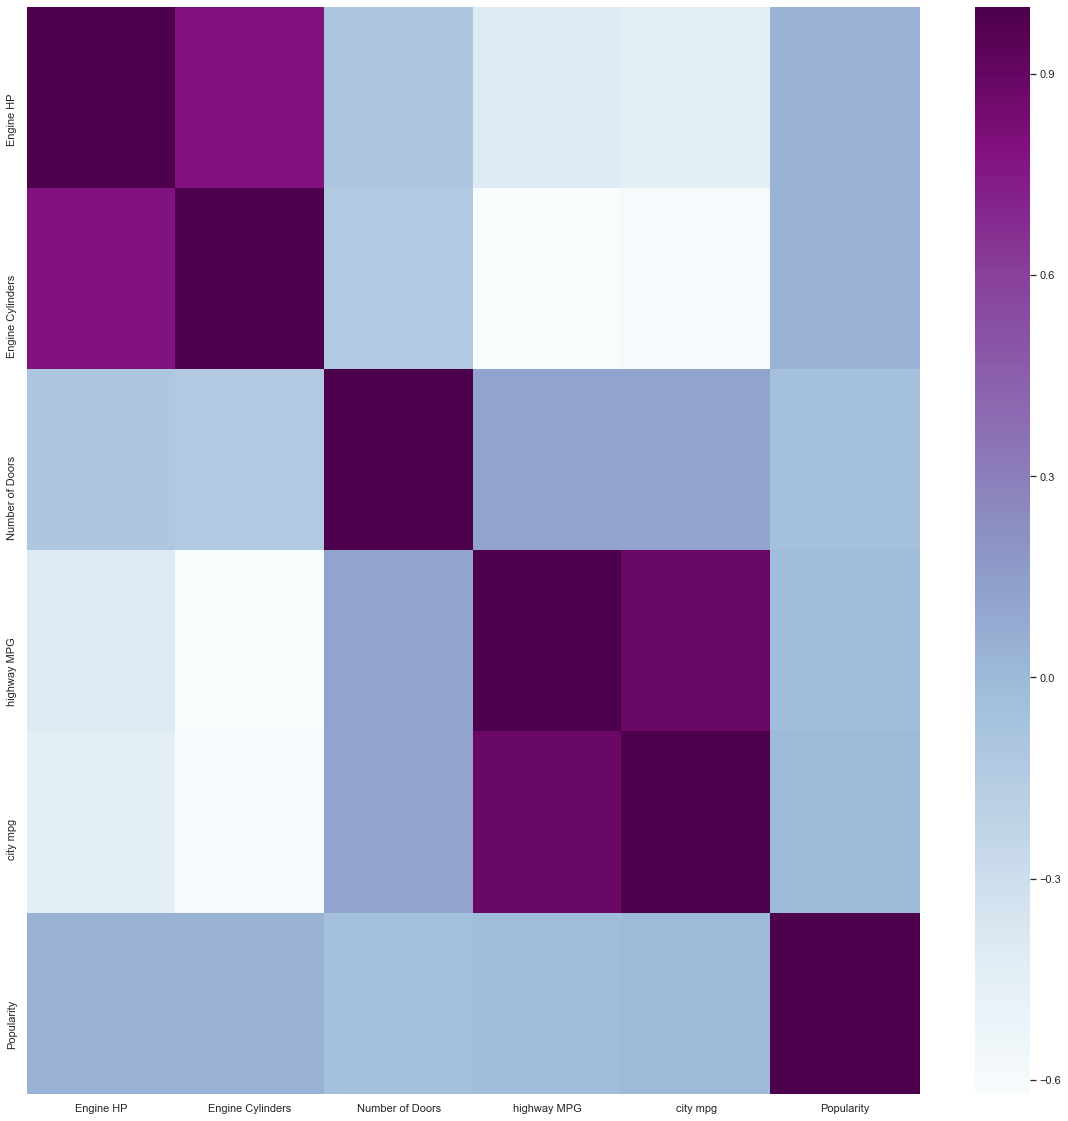

In [28]:
numeric_columns = ['Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity']
heatmap_data = data[numeric_columns].corr()

sns.heatmap(heatmap_data, cmap = 'BuPu')

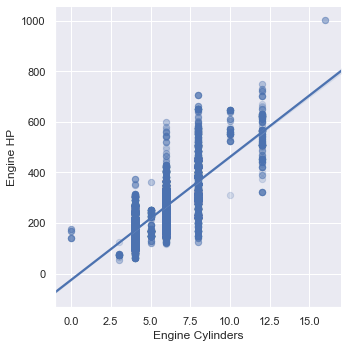

In [29]:
sns.lmplot(x = 'Engine Cylinders', y = 'Engine HP', scatter_kws = {"s": 40, "alpha": 0.2}, data = data)

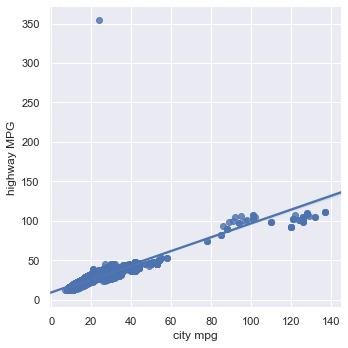

In [30]:
sns.lmplot(x = 'city mpg', y = 'highway MPG', data = data)

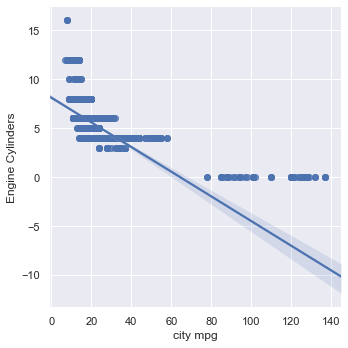

In [31]:
sns.lmplot(x = 'city mpg', y = 'Engine Cylinders', data = data)

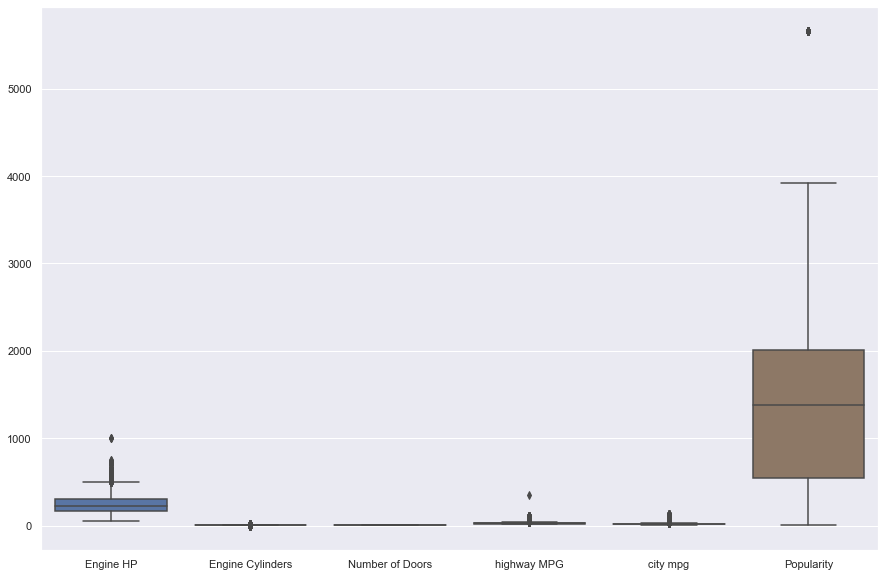

In [32]:
boxplot_data = data[numeric_columns]
sns.set(rc = {'figure.figsize': (15, 10)})
sns.boxplot(data = boxplot_data)

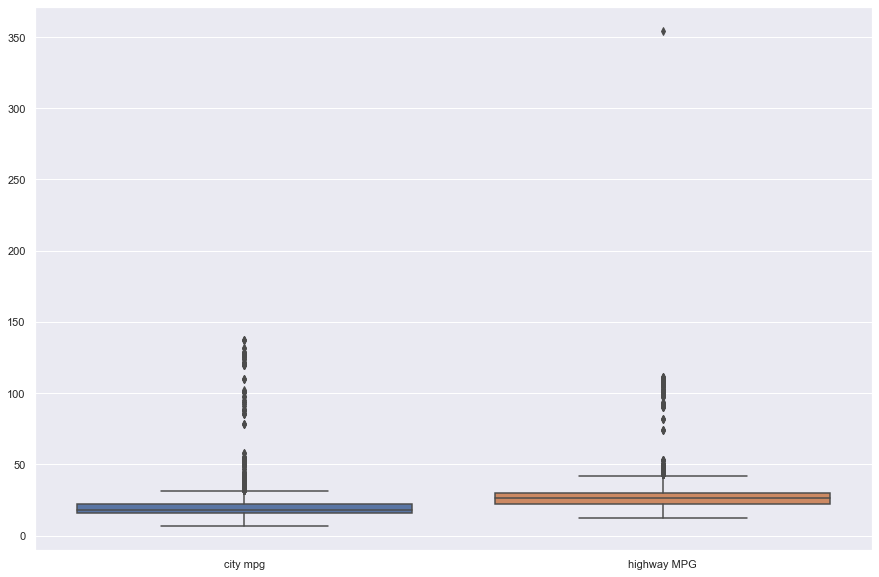

In [33]:
sns.boxplot(data = data[['city mpg', 'highway MPG']])

In [34]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [35]:
from sklearn.preprocessing import OneHotEncoder

In [36]:
enc = OneHotEncoder(handle_unknown = 'ignore')
enc.fit(data[['Year', 'Make', 'Transmission Type']])
enc.categories_

[array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
        2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
        2012, 2013, 2014, 2015, 2016, 2017], dtype=int64),
 array(['Acura', 'Alfa Romeo', 'Aston Martin', 'Audi', 'BMW', 'Bentley',
        'Bugatti', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge',
        'FIAT', 'Ferrari', 'Ford', 'GMC', 'Genesis', 'HUMMER', 'Honda',
        'Hyundai', 'Infiniti', 'Kia', 'Lamborghini', 'Land Rover', 'Lexus',
        'Lincoln', 'Lotus', 'Maserati', 'Maybach', 'Mazda', 'McLaren',
        'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Oldsmobile', 'Plymouth',
        'Pontiac', 'Porsche', 'Rolls-Royce', 'Saab', 'Scion', 'Spyker',
        'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo'],
       dtype=object),
 array(['AUTOMATED_MANUAL', 'AUTOMATIC', 'DIRECT_DRIVE', 'MANUAL',
        'UNKNOWN'], dtype=object)]

In [37]:
enc.transform(data[['Year', 'Make', 'Transmission Type']]).toarray().shape

(11914, 81)

In [38]:
len(data)

11914

In [39]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [40]:
data['Engine Fuel Type'].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'electric',
       'flex-fuel (premium unleaded recommended/E85)', 'natural gas',
       'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)', nan], dtype=object)

In [41]:
data['Engine Fuel Type'].nunique()

10

In [42]:
sample_data = data[['Make', 'MSRP']]


In [43]:
sample_data.head()

,Make,MSRP
0,BMW,46135
1,BMW,40650
2,BMW,36350
3,BMW,29450
4,BMW,34500


In [44]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [45]:
data['Engine Fuel Type'].value_counts()

regular unleaded                                7172
premium unleaded (required)                     2009
premium unleaded (recommended)                  1523
flex-fuel (unleaded/E85)                         899
diesel                                           154
electric                                          66
flex-fuel (premium unleaded required/E85)         54
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: Engine Fuel Type, dtype: int64

In [46]:
data[data['Engine Fuel Type'].isnull()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,20199
11323,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,18499


In [47]:
data['Engine Fuel Type'] = data['Engine Fuel Type'].fillna('regular unleaded')

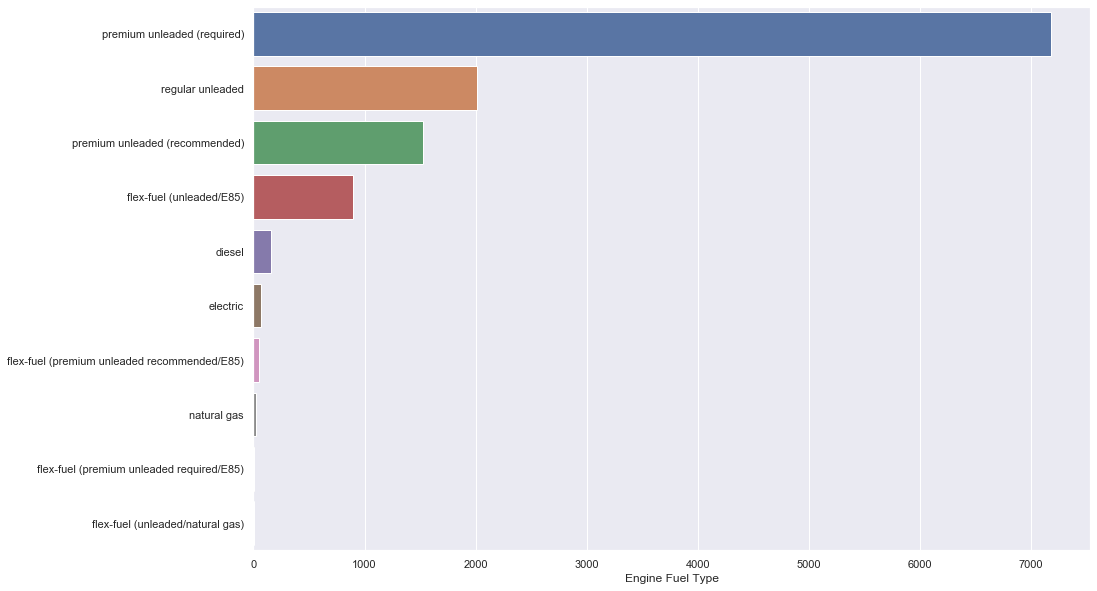

In [50]:
sns.barplot(x = data['Engine Fuel Type'].value_counts(), y = data['Engine Fuel Type'].unique())

In [51]:
data[data['Engine HP'].isnull()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
539,FIAT,500e,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
2905,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,all wheel drive,4.0,Luxury,Large,Sedan,25,17,61,55915
2906,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Large,Sedan,27,18,61,62915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9850,Kia,Soul EV,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,NaN,Compact,Wagon,92,120,1720,35700
9851,Kia,Soul EV,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,NaN,Compact,Wagon,92,120,1720,33700
9852,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,NaN,Compact,Wagon,92,120,1720,33950
9853,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,NaN,Compact,Wagon,92,120,1720,31950


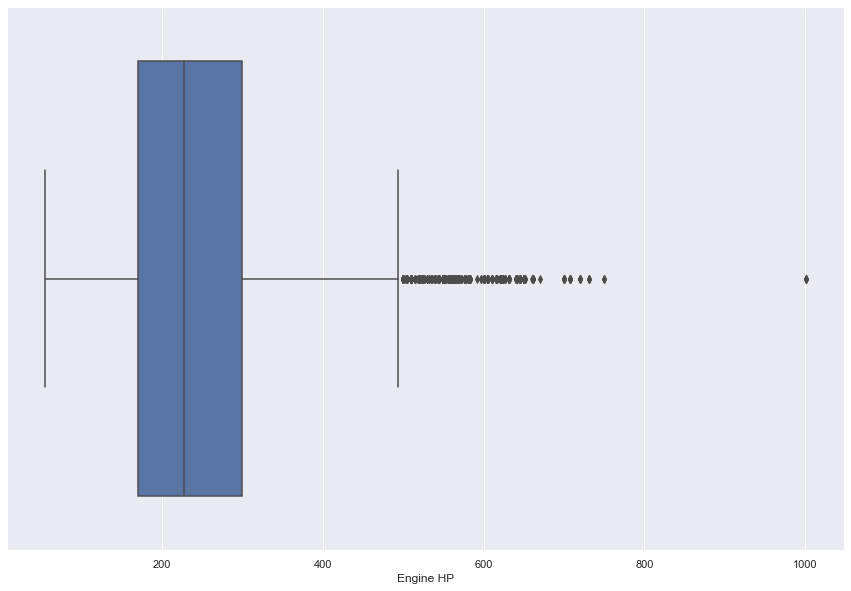

In [52]:
sns.boxplot(data['Engine HP'])

In [53]:
data['Engine HP'].value_counts()

200.0    456
170.0    351
210.0    320
240.0    268
285.0    246
        ... 
557.0      1
123.0      1
535.0      1
372.0      1
553.0      1
Name: Engine HP, Length: 356, dtype: int64

In [54]:
data['Engine HP'] = data['Engine HP'].fillna(200)

In [55]:
data['Engine HP'].value_counts()

200.0    525
170.0    351
210.0    320
240.0    268
285.0    246
        ... 
557.0      1
123.0      1
535.0      1
372.0      1
553.0      1
Name: Engine HP, Length: 356, dtype: int64

In [56]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        0
Engine HP               0
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [57]:
data['Number of Doors'].value_counts()

4.0    8353
2.0    3160
3.0     395
Name: Number of Doors, dtype: int64

In [58]:
data['Number of Doors'] = data['Number of Doors'].fillna(4.0)

In [59]:
data['Number of Doors'].value_counts()

4.0    8359
2.0    3160
3.0     395
Name: Number of Doors, dtype: int64

In [60]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        0
Engine HP               0
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [61]:
data['Market Category'].unique()

array(['Factory Tuner,Luxury,High-Performance', 'Luxury,Performance',
       'Luxury,High-Performance', 'Luxury', 'Performance', 'Flex Fuel',
       'Flex Fuel,Performance', nan, 'Hatchback',
       'Hatchback,Luxury,Performance', 'Hatchback,Luxury',
       'Luxury,High-Performance,Hybrid', 'Diesel,Luxury',
       'Hatchback,Performance', 'Hatchback,Factory Tuner,Performance',
       'High-Performance', 'Factory Tuner,High-Performance',
       'Exotic,High-Performance', 'Exotic,Factory Tuner,High-Performance',
       'Factory Tuner,Performance', 'Crossover', 'Exotic,Luxury',
       'Exotic,Luxury,High-Performance', 'Exotic,Luxury,Performance',
       'Factory Tuner,Luxury,Performance', 'Flex Fuel,Luxury',
       'Crossover,Luxury', 'Hatchback,Factory Tuner,Luxury,Performance',
       'Crossover,Hatchback', 'Hybrid', 'Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance',
       'Exotic,Factory Tuner,Luxury,High-Performance',
   

In [62]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


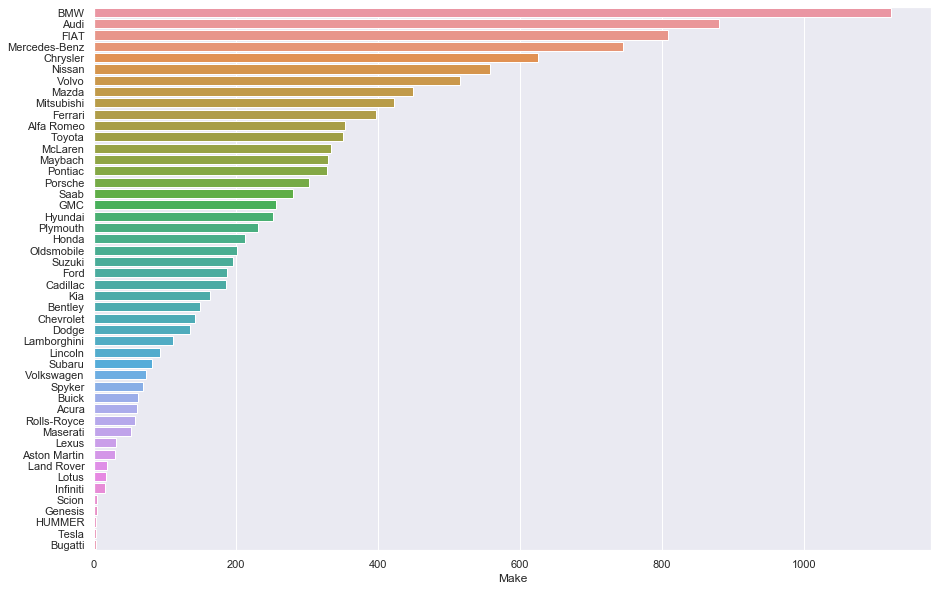

In [63]:
sns.barplot(y = data['Make'].unique(), x = data['Make'].value_counts())

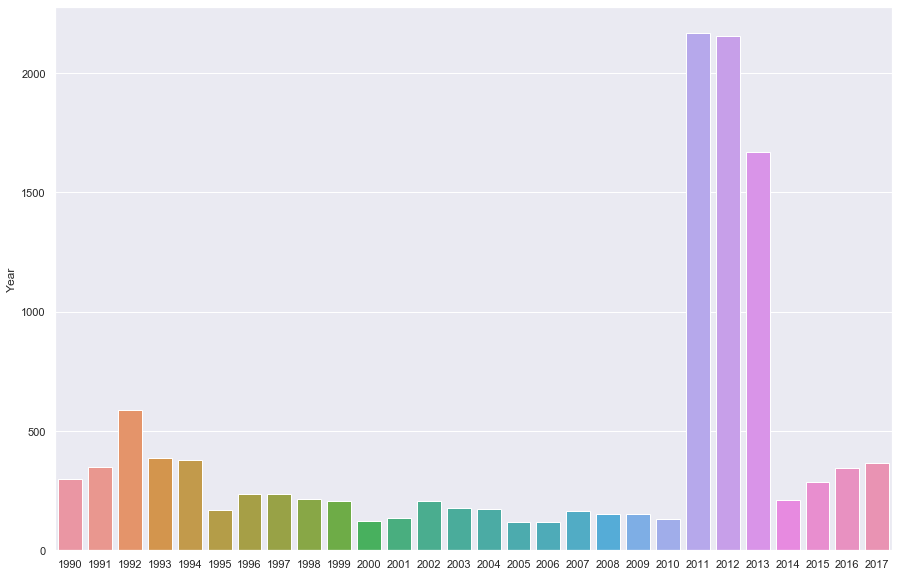

In [64]:
sns.barplot(y = data['Year'].value_counts(), x = data['Year'].unique())

In [65]:
data['Present Year'] = 2021

In [67]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Present Year
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,2021
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,2021
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,2021
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,2021
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,2021


In [68]:
data['Years Of Manufacture'] = data['Present Year'] - data['Year']

In [71]:
data.drop(['Year'], inplace = True, axis = 1)

In [73]:
data.drop(['Present Year'], inplace = True, axis = 1)

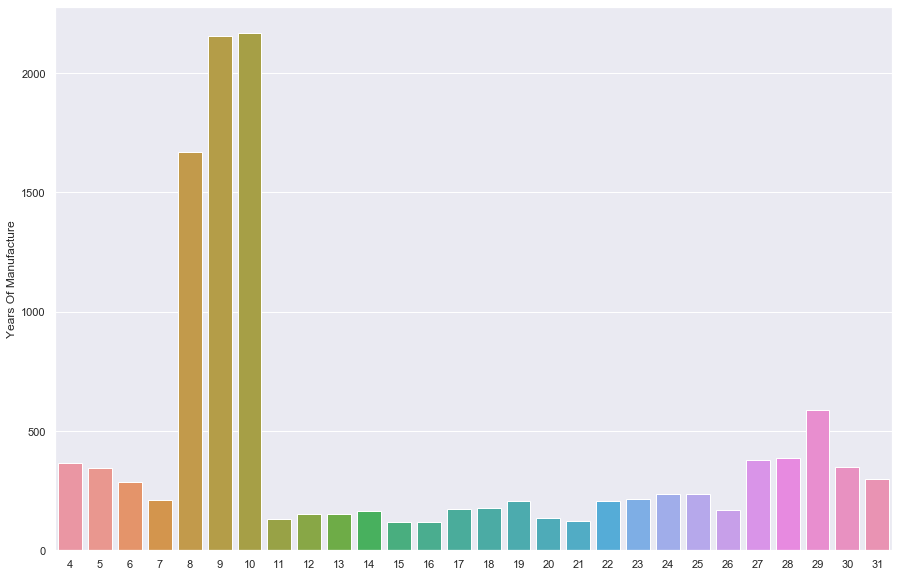

In [76]:
sns.barplot(y = data['Years Of Manufacture'].value_counts(), x = data['Years Of Manufacture'].unique())

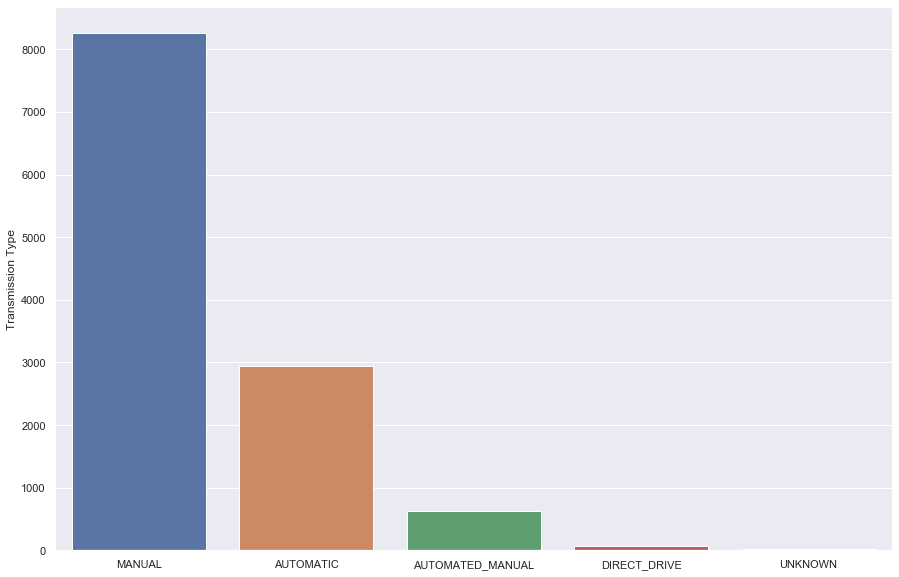

In [77]:
sns.barplot(x = data['Transmission Type'].unique(), y = data['Transmission Type'].value_counts())

In [78]:
data['Transmission Type'].value_counts()

AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: Transmission Type, dtype: int64

In [79]:
data.head()

,Make,Model,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Years Of Manufacture
0,BMW,1 Series M,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,10
1,BMW,1 Series,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,10
2,BMW,1 Series,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,10
3,BMW,1 Series,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,10
4,BMW,1 Series,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,10


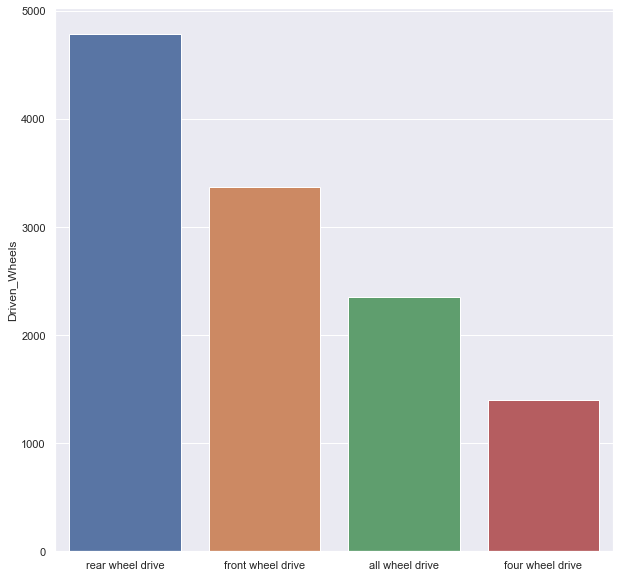

In [80]:
sns.set(rc = {'figure.figsize': (10, 10)})
sns.barplot(x = data['Driven_Wheels'].unique(), y = data['Driven_Wheels'].value_counts())

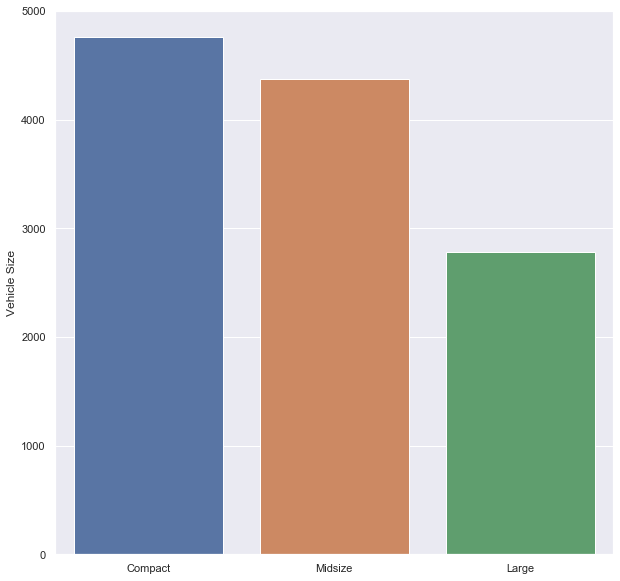

In [81]:
sns.barplot(x = data['Vehicle Size'].unique(), y = data['Vehicle Size'].value_counts())

In [82]:
data.isnull().sum()

Make                       0
Model                      0
Engine Fuel Type           0
Engine HP                  0
Engine Cylinders          30
Transmission Type          0
Driven_Wheels              0
Number of Doors            0
Market Category         3742
Vehicle Size               0
Vehicle Style              0
highway MPG                0
city mpg                   0
Popularity                 0
MSRP                       0
Years Of Manufacture       0
dtype: int64

In [83]:
data['Engine Cylinders'].value_counts()

4.0     4752
6.0     4489
8.0     2031
12.0     230
5.0      225
10.0      68
0.0       56
3.0       30
16.0       3
Name: Engine Cylinders, dtype: int64

In [84]:
data['Engine Cylinders'] = data['Engine Cylinders'].fillna(4.0)

In [85]:
data.head()

,Make,Model,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Years Of Manufacture
0,BMW,1 Series M,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,10
1,BMW,1 Series,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,10
2,BMW,1 Series,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,10
3,BMW,1 Series,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,10
4,BMW,1 Series,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,10


In [86]:
data.isnull().sum()

Make                       0
Model                      0
Engine Fuel Type           0
Engine HP                  0
Engine Cylinders           0
Transmission Type          0
Driven_Wheels              0
Number of Doors            0
Market Category         3742
Vehicle Size               0
Vehicle Style              0
highway MPG                0
city mpg                   0
Popularity                 0
MSRP                       0
Years Of Manufacture       0
dtype: int64

In [87]:
data.dropna(inplace = True)

In [88]:
data.isnull().sum()

Make                    0
Model                   0
Engine Fuel Type        0
Engine HP               0
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Market Category         0
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
Years Of Manufacture    0
dtype: int64

In [89]:
data.head()

,Make,Model,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Years Of Manufacture
0,BMW,1 Series M,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,10
1,BMW,1 Series,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,10
2,BMW,1 Series,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,10
3,BMW,1 Series,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,10
4,BMW,1 Series,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,10


In [90]:
sklearn_ohe = OneHotEncoder()

In [91]:
sklearn_dummies1 = sklearn_ohe.fit_transform(data['Make'].to_frame())
sklearn_dummies_df1 = pd.DataFrame(data = sklearn_dummies1.toarray(), columns = sklearn_ohe.categories_)

sklearn_dummies2 = sklearn_ohe.fit_transform(data['Model'].to_frame())
sklearn_dummies_df2 = pd.DataFrame(data = sklearn_dummies2.toarray(), columns = sklearn_ohe.categories_)

sklearn_dummies3 = sklearn_ohe.fit_transform(data['Engine Fuel Type'].to_frame())
sklearn_dummies_df3 = pd.DataFrame(data = sklearn_dummies3.toarray(), columns = sklearn_ohe.categories_)

sklearn_dummies4 = sklearn_ohe.fit_transform(data['Engine Cylinders'].to_frame())
sklearn_dummies_df4 = pd.DataFrame(data = sklearn_dummies4.toarray(), columns = sklearn_ohe.categories_)

sklearn_dummies5 = sklearn_ohe.fit_transform(data['Transmission Type'].to_frame())
sklearn_dummies_df5 = pd.DataFrame(data = sklearn_dummies5.toarray(), columns = sklearn_ohe.categories_)

sklearn_dummies6  = sklearn_ohe.fit_transform(data['Driven_Wheels'].to_frame())
sklearn_dummies_df6 = pd.DataFrame(data = sklearn_dummies6.toarray(), columns = sklearn_ohe.categories_)

sklearn_dummies7 = sklearn_ohe.fit_transform(data['Vehicle Size'].to_frame())
sklearn_dummies_df7 = pd.DataFrame(data = sklearn_dummies7.toarray(), columns = sklearn_ohe.categories_)

sklearn_dummies8 = sklearn_ohe.fit_transform(data['Vehicle Style'].to_frame())
sklearn_dummies_df8 = pd.DataFrame(data = sklearn_dummies8.toarray(), columns = sklearn_ohe.categories_)

sklearn_dummies10 = sklearn_ohe.fit_transform(data['Number of Doors'].to_frame())
sklearn_dummies_df10 = pd.DataFrame(data = sklearn_dummies10.toarray(), columns = sklearn_ohe.categories_)

In [92]:
concatenated_df = pd.concat([sklearn_dummies_df1, sklearn_dummies_df2, sklearn_dummies_df3, sklearn_dummies_df4, sklearn_dummies_df5, sklearn_dummies_df6, sklearn_dummies_df7, sklearn_dummies_df8, sklearn_dummies_df10], axis = 1)


In [93]:
concatenated_df.shape

(8172, 820)

In [94]:
concatenated_df.isnull().sum()

Acura           0
Alfa Romeo      0
Aston Martin    0
Audi            0
BMW             0
               ..
Sedan           0
Wagon           0
2.0             0
3.0             0
4.0             0
Length: 820, dtype: int64

In [95]:
#This should be executed before concatenation so that there are no NULL values after concatenating
data['Engine HP'].reset_index(drop = True, inplace = True)
data['highway MPG'].reset_index(drop = True, inplace = True)
data['city mpg'].reset_index(drop = True, inplace = True)
data['Popularity'].reset_index(drop = True, inplace = True)
data['MSRP'].reset_index(drop = True, inplace = True)

In [96]:
result = pd.concat([concatenated_df, data['Engine HP'].to_frame(), data['highway MPG'].to_frame(), data['city mpg'].to_frame(), data['Popularity'].to_frame(), data['MSRP'].to_frame()], axis = 1)

In [97]:
result.isnull().sum()

(Acura,)           0
(Alfa Romeo,)      0
(Aston Martin,)    0
(Audi,)            0
(BMW,)             0
                  ..
Engine HP          0
highway MPG        0
city mpg           0
Popularity         0
MSRP               0
Length: 825, dtype: int64

In [98]:
result.shape

(8172, 825)

In [106]:
result.head()

,"(Acura,)","(Alfa Romeo,)","(Aston Martin,)","(Audi,)","(BMW,)","(Bentley,)","(Bugatti,)","(Buick,)","(Cadillac,)","(Chevrolet,)",...,"(Sedan,)","(Wagon,)","(2.0,)","(3.0,)","(4.0,)",Engine HP,highway MPG,city mpg,Popularity,MSRP
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,335.0,26,19,3916,46135
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,300.0,28,19,3916,40650
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,300.0,28,20,3916,36350
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,230.0,28,18,3916,29450
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,230.0,28,18,3916,34500


In [131]:
def data_preprocessor(X, y, standardize = False, normalize = False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)
    if standardize or normalize:
        if standardize:
            scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
        else:
            scaler = MinMaxScaler(copy=True,feature_range=(0,1))
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return(X_train_scaled, X_test_scaled, y_train, y_test)

In [132]:
X = result.drop(['MSRP'], axis = 1)
y = result['MSRP']
X_train, X_test, y_train, y_test = data_preprocessor(X, y, normalize = True)    

In [133]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.04678363, 0.09230769,
        0.28442158],
       [0.        , 0.        , 0.        , ..., 0.0380117 , 0.06153846,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.02923977, 0.06923077,
        0.17601136],
       ...,
       [0.        , 0.        , 0.        , ..., 0.02631579, 0.06923077,
        0.10982967],
       [0.        , 0.        , 0.        , ..., 0.02923977, 0.06153846,
        0.28442158],
       [0.        , 0.        , 0.        , ..., 0.01754386, 0.03076923,
        0.08853797]])

In [134]:
model = LinearRegression()
model.fit(X_train, y_train)
predicted_test = model.predict(X_test)

In [140]:
predicted_test

array([69658., 66146., 10566., ..., 25278.,  4312., 40990.])

In [139]:
y_test

5078     74260
2060     63855
4212     21050
4664    111900
2471    290461
         ...  
7713     33260
2674     33785
2944     25790
6238      2112
4983     40130
Name: MSRP, Length: 2452, dtype: int64

In [143]:
mean_squared_error(predicted_test, y_test)

1.5056599332811635e+28

In [105]:
kfold = KFold(n_splits = 5, random_state = 7, shuffle = True)
model = LinearRegression()
scoring = 'neg_mean_absolute_error'
results = cross_val_score(model, X, y, cv = kfold, scoring = scoring)


In [106]:
results.std()

3716353088.8288584

In [406]:
cv_results = model.predict(X_)

array([-4.56135169e+03, -1.08229584e+09, -1.94124235e+09, -1.46335806e+09,
       -4.94773098e+03])

In [387]:
from sklearn.model_selection import cross_val_score

In [388]:
results = cross_val_score(neigh, X_cv, y_cv, scoring = 'accuracy')
print(results)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [293]:
len(cross_validation)

1716

In [294]:
np.power((y_cv - cross_validation), 2).sum()/len(cross_validation)

MSRP    1.240553e+20
dtype: float64

In [269]:
X.head()

,"(Acura,)","(Alfa Romeo,)","(Aston Martin,)","(Audi,)","(BMW,)","(Bentley,)","(Bugatti,)","(Buick,)","(Cadillac,)","(Chevrolet,)",...,"(2015,)","(2016,)","(2017,)","(2.0,)","(3.0,)","(4.0,)",Engine HP,highway MPG,city mpg,Popularity
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,335.0,26,19,3916
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,300.0,28,19,3916
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,300.0,28,20,3916
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,230.0,28,18,3916
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,230.0,28,18,3916


In [295]:
cross_validation

array([[ 1213.39038086],
       [20641.98052979],
       [19087.05993652],
       ...,
       [44169.73828125],
       [24805.07617188],
       [ 2248.85015869]])

In [296]:
y_cv

,MSRP
22,2000
2202,21240
5097,18550
5049,29265
201,42690
...,...
1432,31995
6261,43450
5535,43150
4240,31105
